In [12]:
from scipy.stats.distributions import invgamma
from scipy.stats.distributions import expon

import numpy as np
import matplotlib.pyplot as plt
import math

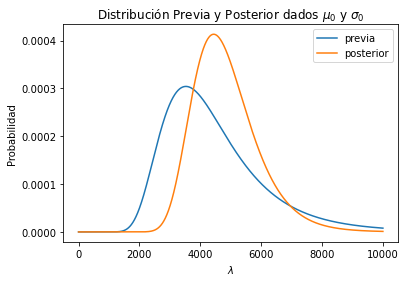

In [4]:
###Cuarto punto#####

plt.rcParams['text.usetex'] = False
alambres=np.array( (495,541,1461,1555,1603,2201,2750,3468,3516,4319,6622,7728,13159,21194) )#media 5043.714
n=len(alambres)
s=alambres.sum()

a=33/4
b=32625
x = np.linspace(0, 10000, 10000)
preLambda=invgamma.pdf(x, a,scale=b)
posLambda=invgamma.pdf(x, a+n,scale=b+s)

plt.plot(x, preLambda, label='previa')
plt.plot(x, posLambda, label='posterior')
#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel(r'$\lambda$')
plt.ylabel('Probabilidad' )
plt.title(r"Distribución Previa y Posterior dados $\mu_0$ y $\sigma_0$")
plt.legend()
plt.savefig('previayposterior.png')
plt.show()

In [37]:
np.random.seed(1234)
B=25000
posLambda=invgamma.rvs(a+n,scale=b+s,size=B)
print(posLambda.shape)

predicPos=np.empty(B)

for i in range(B):
    predicPos[i]=np.mean(expon.rvs(1/posLambda[i],size=B))
print(predicPos.shape)

(25000,)
(25000,)


In [38]:
##Posterior
print(round(np.mean(posLambda <4000), 8))
##Predictiva posterior
print(round(np.mean(predicPos <4000),8))

0.219
1.0


In [34]:
!pip install joblib
from joblib import Parallel, delayed

Parallel(n_jobs=2)(delayed(sqrt_func)(i, j) for i in range(5) for j in range(2))

In [ ]:
# Paralle